In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
help("modules")


Please wait a moment while I gather a list of all available modules...



C:\ProgramData\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:12: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated since IPython 4.0."
C:\ProgramData\Anaconda3\lib\pkgutil.py:93: MatplotlibDeprecationWarning: 
The matplotlib.compat module was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  __import__(info.name)
C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn(


Update LANGUAGE_CODES (inside config/base.py) if a new translation has been added to Spyder


QSS file sucessfuly loaded.
Found application patches to be applied.
No QCoreApplication instance found. Application patches not applied. You have to call load_stylesheet function after instantiation of QApplication to take effect. 
C:\ProgramData\Anaconda3\lib\pkgutil.py:108: VisibleDeprecationWarning: zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    
  yield from walk_packages(path, info.name+'.', onerror)


Cython              codecs              modulefinder        sortedcontainers
IPython             codeop              more_itertools      soupsieve
OpenSSL             collections         mpmath              sphinx
PIL                 colorama            msgpack             sphinxcontrib
PyQt5               colorsys            msilib              spyder
TBB                 commctrl            msvcrt              spyder_kernels
__future__          compileall          multipledispatch    sqlalchemy
_abc                comtypes            multiprocessing     sqlite3
_aix_support        concurrent          munkres             sre_compile
_ast                conda               mypy_extensions     sre_constants
_asyncio            conda_build         nacl                sre_parse
_bisect             conda_content_trust navigator_updater   ssl
_black_version      conda_env           nbclassic           sspi
_blake2             conda_pack          nbclient            sspicon
_bootlocale       

In [3]:
xdata = [ 1, 2,3,4,5,10,20,30,40,50,100,150,200,250]
ydata = [0.05,0.06,0.07,0.08,0.09,0.20,0.25,0.28,0.33,0.40,0.60,0.70,0.73,0.75]

In [6]:
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')


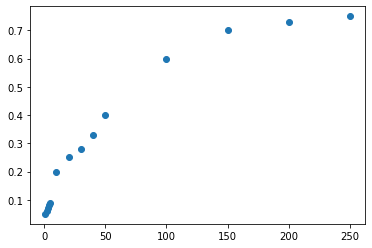

In [11]:
%matplotlib inline  
plt.plot(xdata, ydata, 'o')

0.9497802839014228
58.50529910371317
[[2.12114373e-03 4.41002407e-01]
 [4.41002407e-01 1.02464109e+02]]


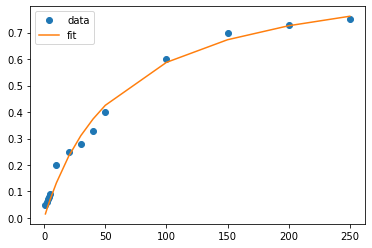

In [22]:
def Nonlinear (x, A, B):
    return (A - (B /(x+ (B/A))))

#where ydata denotes reach, x denotes TRP, A and B are two parameters estimated from the reach curve
#and may vary depending on the campaign and the minimum frequency at which reach is measured.
#This functional form guarantees that zero TRP corresponds to zero reach, and for positive b reach
#is increasing in TRP. A is the limit of the reach curve, which is the theoretical reach of the TV plan
#if an infinite amount of TRPs are bought.

parameters_N, covariance_N = curve_fit(Nonlinear, xdata, ydata)
fit_NA = parameters_N[0]
fit_NB = parameters_N[1]


print(fit_NA)
print(fit_NB)

print(covariance_N)


fit_y = Nonlinear(xdata, fit_NA, fit_NB)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

0.6090645567684746
0.7426524964911666
0.0317827895323908
-0.0008831379874454364
[[ 5.76375654e-03  2.60219421e-03 -3.12936232e-04  4.42205570e-05]
 [ 2.60219421e-03  7.03222712e-03  2.67261207e-05  2.10750191e-05]
 [-3.12936232e-04  2.67261207e-05  2.60312735e-05 -2.31066162e-06]
 [ 4.42205570e-05  2.10750191e-05 -2.31066162e-06  3.54238953e-07]]


C:\Users\antcajka\AppData\Local\Temp/ipykernel_61160/2011263583.py:2: RuntimeWarning: overflow encountered in exp
  return A * np.exp (-np.exp(B-(G*x))-D*x)


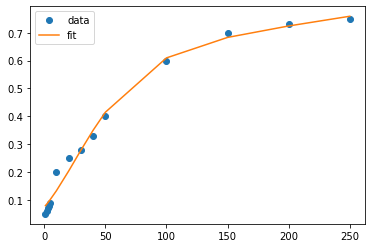

In [23]:
def MWF_Modified_Gompertz_Function (x, A, B, G, D):
    return A * np.exp (-np.exp(B-(G*x))-D*x)

#https://static.googleusercontent.com/media/research.google.com/no//pubs/archive/40426.pdf

parameters, covariance = curve_fit(MWF_Modified_Gompertz_Function, xdata, ydata)

fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]
print(fit_A)
print(fit_B)
print(fit_C)
print(fit_D)

print(covariance)



fit_y = MWF_Modified_Gompertz_Function(xdata, fit_A, fit_B, fit_C, fit_D)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()





